# CDS-102: Lab 12 Workbook
## Name: Helena Gray
### April 20, 2017

In [9]:
# Run this code block to load the Tidyverse package
.libPaths(new = "~/Rlibs")
library(tidyverse)
library(modelr)

In [ ]:
# To change the size of any plots, copy the code snippet
# below, uncomment it, and set the size of the width
# and height.
# Note: All subsequent figures will use the same size,
# unless you change the options() snippet and run it
# again.

# options(repr.plot.width=6, repr.plot.height=4)

In [10]:
# Load the datasets
t.data <- read_csv("MDBALTIM_JAN1995_DEC2016.csv")
sine.change.period <- read_csv("sine_change_period.csv")
head(t.data)
head(sine.change.period)

Parsed with column specification:
cols(
  month = col_integer(),
  day = col_integer(),
  year = col_integer(),
  t.avg = col_double()
)
Parsed with column specification:
cols(
  x = col_double(),
  y = col_double()
)


month day year t.avg
1 1     1   1995 42.3 
2 1     2   1995 39.8 
3 1     3   1995 28.0 
4 1     4   1995 32.3 
5 1     5   1995 20.6 
6 1     6   1995 24.4

x   y         
1 0.0 0.08565849
2 0.1 0.22140428
3 0.2 0.41207749
4 0.3 0.50004602
5 0.4 0.63865998
6 0.5 0.81013584

### Lab Task 1###

The code below adds a column that counts the number of days since January 1995.


In [11]:
ndays <- nrow(t.data)
t.data <- add_column(t.data, .before=TRUE, number_days=1:ndays)

### Lab Task 2###

The code below filters out rows where the value of the average temperature is
unknown (which are given a value of −99) and assigns the filtered data to a variable 't.data.filtered'.

In [12]:
t.data.filtered<-filter(t.data,t.avg!=-99)

### Lab Task 3###
The code below uses t.data.filtered to create a point plot of t.avg as a function of number_days and sets the
size of the points to 0.5.


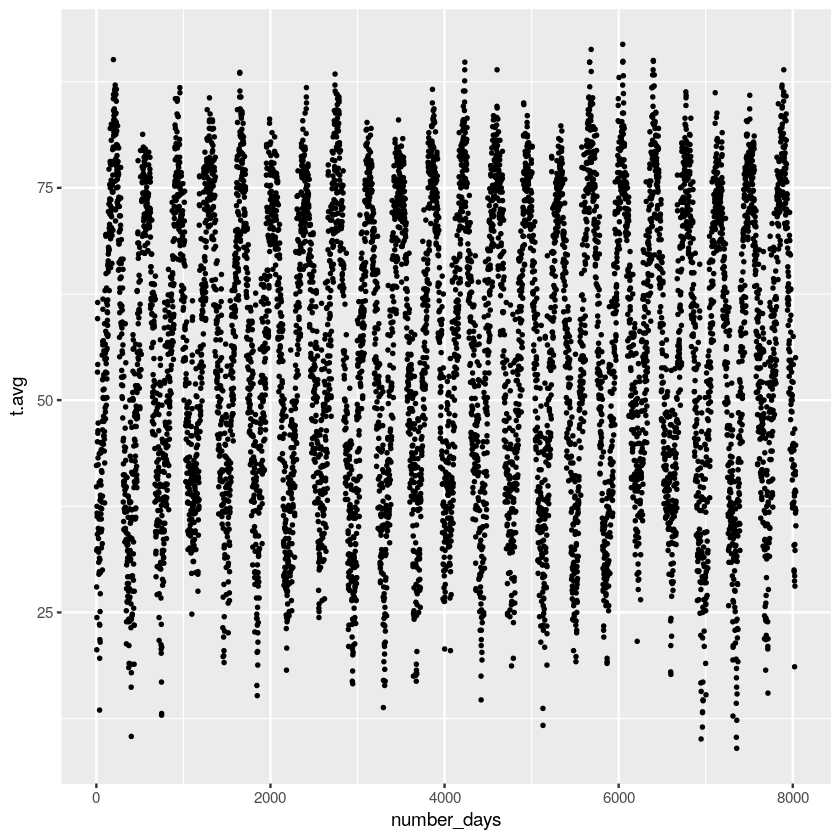

In [13]:
avg_daily_tempPlot<-ggplot(t.data.filtered, aes(number_days, t.avg)) + geom_point(mapping=aes(number_days,t.avg),size=.5)
ggsave("avg_daily_tempPlot.png", plot = avg_daily_tempPlot, device="png", scale=1, width=5, height=4)
avg_daily_tempPlot

The plot above shows that the average daily temperature oscillates with respect to time. This behavior is very similar to the behavior of a sine function.

### Lab Task 4###

The code below creates a series of values for the explanatory variable x and stores it in a tibble, 'sine.examples'.

In [14]:
x <- seq(0, 4*pi, 0.01)
sine.examples <- tibble(x=x)


The code below creates a custom function for the sine function and subsequently tests it.

In [15]:
model.sin <- function(A, B, T, n, x)
{
A * sin((2 * pi / T) * (x - n)) + B
}
model.sin(A=1, B=0, T=1, n=0, x=pi/2)


[1] -0.4303012

### Lab Task 5###

The following code generates two different values for the amplitude (columns A=0.5 & A=1.5) using the mutate() function and our custom function model.sin() and assigning it to a variable sine.examples. The tibble is then printed with the print() function.

In [16]:
sine.examples <- mutate(
sine.examples, `A=0.5`=model.sin(A=0.5, B=0, T=1, n=0, x=x),
`A=1.5`=model.sin(A=1.5, B=0, T=1, n=0, x=x))

print(sine.examples)


# A tibble: 1,257 × 3
       x    `A=0.5`    `A=1.5`
   <dbl>      <dbl>      <dbl>
1   0.00 0.00000000 0.00000000
2   0.01 0.03139526 0.09418578
3   0.02 0.06266662 0.18799985
4   0.03 0.09369066 0.28107197
5   0.04 0.12434494 0.37303483
6   0.05 0.15450850 0.46352549
7   0.06 0.18406228 0.55218683
8   0.07 0.21288965 0.63866894
9   0.08 0.24087684 0.72263051
10  0.09 0.26791340 0.80374019
# ... with 1,247 more rows


### Lab Task 6###

The code below repeats the same procedure for the parameter B which represents the added constant value in the sine function and moves the sine function along the y-axis. Using the mutate() function, columns `B=1` and `B=-0.5` are created with default values for the remaining parameters (A=1, T=1, and n=0).


In [17]:
sine.examples <- mutate(
sine.examples, `B=1`=model.sin(A=1, B=1, T=1, n=0, x=x),
`B=-0.5`=model.sin(A=1, B=-0.5, T=1, n=0, x=x))

### Lab Task 7###

The code below repeats the same procedure for the parameter n which represents a "phase shift" of the sine function or in other words, moving the sine function along the x-axis. Using the mutate() function, columns `n=-1/4` and
`n=1/2` are created with the default values for the remaining parameters (A=1, B=0, and T=1).


In [18]:
sine.examples <- mutate(
sine.examples, `n=-0.25`=model.sin(A=1, B=0, T=1, n=-0.25, x=x),
`n=0.5`=model.sin(A=1, B=0, T=1, n=0.5, x=x))

### Lab Task 8###

The code below repeats the same procedure for the parameter T which represents the period of the sine function or the length between peaks. Using the mutate() function, columns `T=2` and `T=3` are created with the default values for the remaining parameters (A=1, B=0, and n=0).

In [19]:
sine.examples <- mutate(
sine.examples, `T=2`=model.sin(A=1, B=0, T=2, n=0, x=x),
`T=3`=model.sin(A=1, B=0, T=3, n=0, x=x))

### Lab Task 9###

The code below uses the gather() function and a somewhat complicated mutate command to clean it up and create sub-groups.

In [20]:
sine.examples.tidy <- gather(sine.examples, key=parameter,
value=y, `A=0.5`:`T=3`)
sine.examples.tidy <- mutate(
sine.examples.tidy,
parameter_groups=ifelse(
grepl("A", parameter), "A",
ifelse(grepl("B", parameter), "B",
ifelse(grepl("T", parameter), "T", "n")
)))


These subgroups are represented on a plot by lines that are color coded by different values for each parameter of the sine function using ggplot() and geom_line() functions.

Warning message:
“Removed 5024 rows containing missing values (geom_path).”Warning message:
“Removed 5024 rows containing missing values (geom_path).”

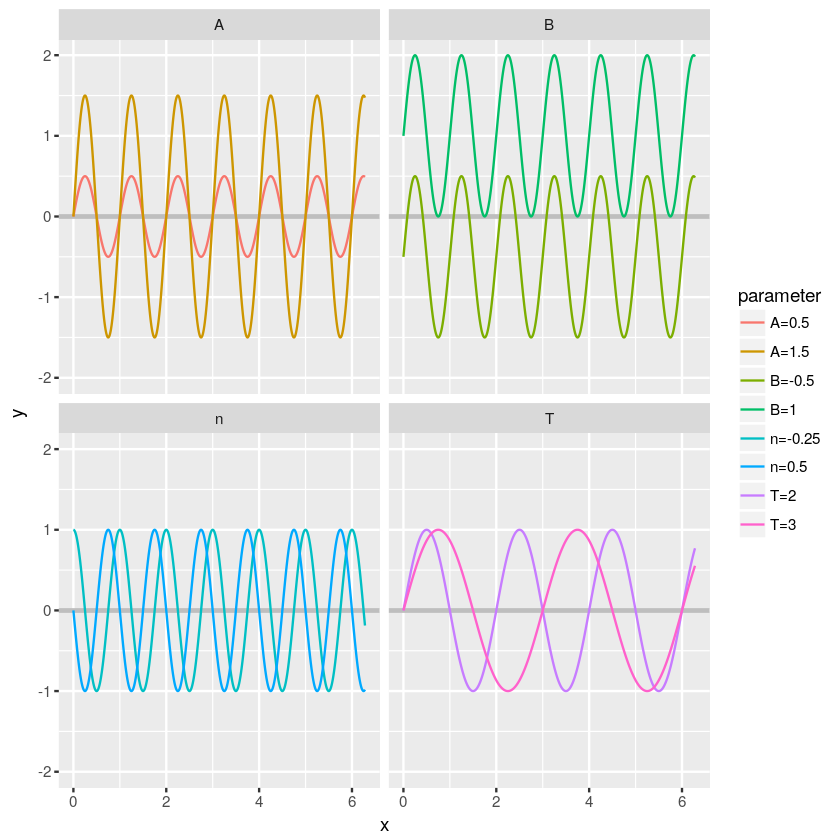

In [21]:
sine.examples.plots<-ggplot(sine.examples.tidy) +
geom_ref_line(h=0, colour="gray", size=1) +
geom_line(aes(x=x, y=y, color=parameter)) +
xlim(c(0, 2 * pi)) +
ylim(c(-2, 2)) +
facet_wrap(~parameter_groups)

ggsave("sine.examples.plots.png", plot = sine.examples.plots, device="png", scale=1, width=5, height=4)
sine.examples.plots


### Lab Task 10###

The code below confirms that the lm() function works and checks that the A and B
parameters, or the amplitude and constant values match the predicted values for the sine function. In this linear model, A=1 and B=0. This is necessary to do so that, in the lm() output, the intercept corresponds to finding the value of B and the slope corresponds to finding the
value of A. Using the lm() function, we cannot find 'n' which is the phase shift or T which is the period automatically. To demonstrate the procedure for the sine function linear model when the phase shift or period are unknown we work an example where the period is unknown, but we do know that A=1, B=0, and n=0 are given. This is the dataset that was loaded into sine.change.period. 

In [22]:
sine.examples.subset1 <- filter(sine.examples.tidy,
parameter=="A=0.5")

sine.examples.subset2 <- filter(sine.examples.tidy,
parameter=="B=-0.5")

sine.examples.subset3 <- filter(sine.examples.tidy,
parameter=="n=-0.25")

sine.examples.lm1 <- lm(y~model.sin(A=1, B=0, T=1, n=0, x=x),
data=sine.examples.subset1)

sine.examples.lm2 <- lm(y~model.sin(A=1, B=0, T=1, n=0, x=x),
data=sine.examples.subset2)

sine.examples.lm3 <- lm(y~model.sin(A=1, B=0, T=1, n=-0.25, x=x),
data=sine.examples.subset3)




### Lab Task 11###

The code below creates a plot of the dataset in sine.change.period, with y being the response variable (vertical
axis) and x being the explanatory variable (horizontal axis).

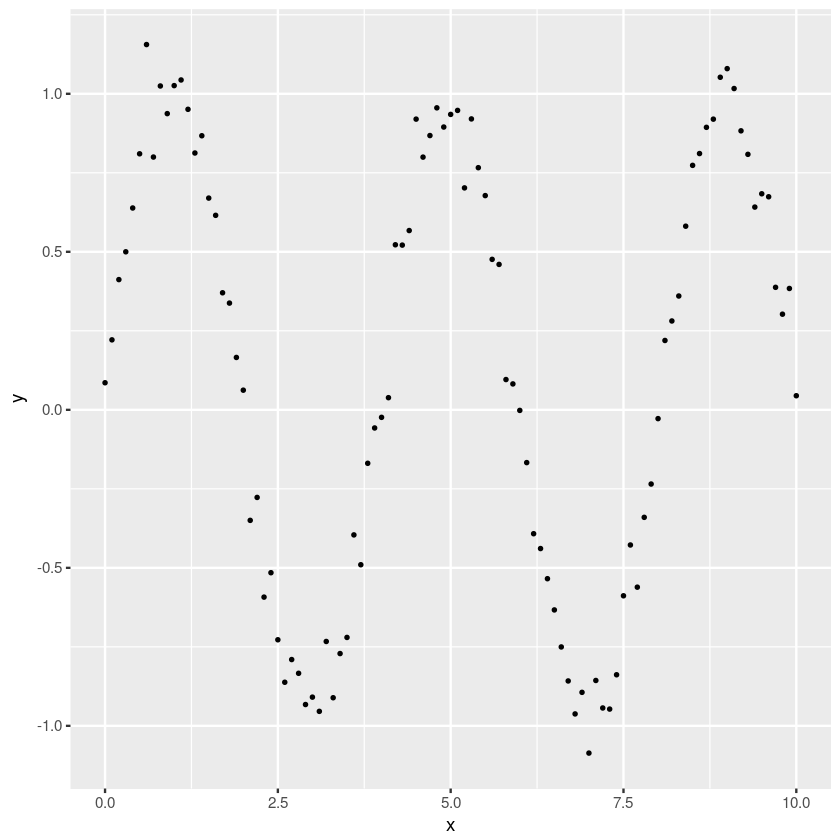

In [23]:
sine.plot<-ggplot(sine.change.period, aes(x, y)) + geom_point(mapping=aes(x,y),size=.5)
ggsave("sine.plot.png", plot = sine.plot, device="png", scale=1, width=5, height=4)
sine.plot

### Lab Task 12###

The code below creates separate lm() models for T=1, T=2, T=3, T=4, and T=5 and assigned to corresponding 'mod' variables.

In [24]:
mod1 <- lm(y~model.sin(A=1, B=0, T=1, n=0, x=x),
data=sine.change.period)

mod2 <- lm(y~model.sin(A=1, B=0, T=2, n=0, x=x),
data=sine.change.period)

mod3 <- lm(y~model.sin(A=1, B=0, T=3, n=0, x=x),
data=sine.change.period)

mod4 <- lm(y~model.sin(A=1, B=0, T=4, n=0, x=x),
data=sine.change.period)

mod5 <- lm(y~model.sin(A=1, B=0, T=5, n=0, x=x),
data=sine.change.period)



### Lab Task 13###

The code below generates fitting information for the models with the gather_predictions() function from the modelr library.

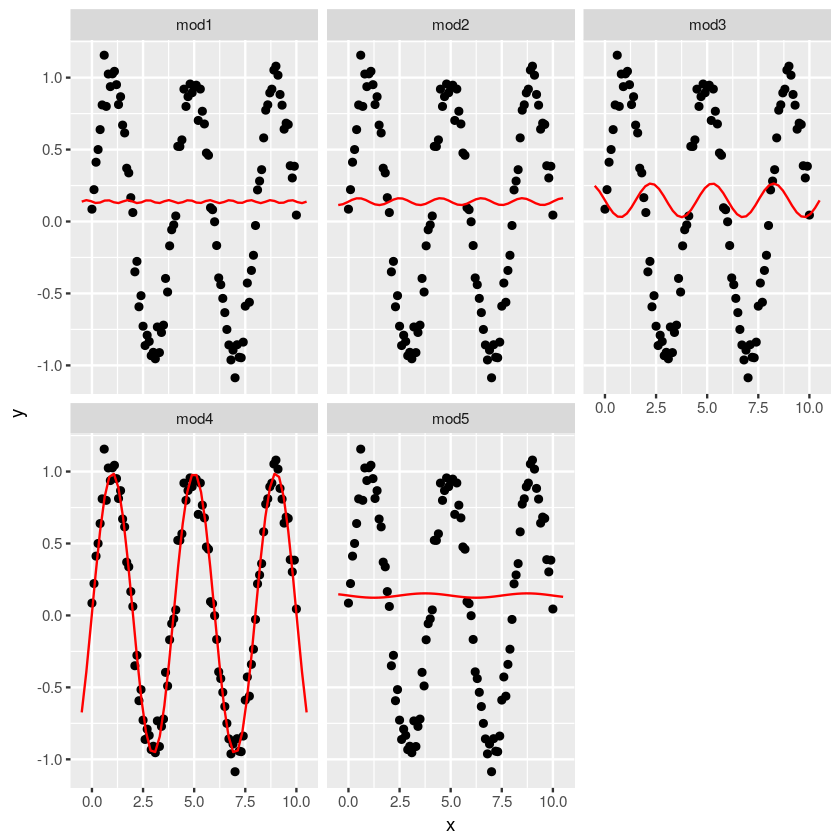

In [25]:
grid <- data_grid(data=sine.change.period,
x=seq_range(x, n=50, expand=0.1))

grid <- gather_predictions(grid, mod1, mod2, mod3,
mod4, mod5, .pred="y")

sine.change.period.plot<-ggplot(sine.change.period) +
geom_point(aes(x, y)) +
geom_line(data=grid, aes(x, y), color="red") +
facet_wrap(~model)
ggsave("sine.change.period.plot.png", plot = sine.change.period.plot, device="png", scale=1, width=5, height=4)
sine.change.period.plot


### Lab Task 14###

The code below calculates and plots the raw residuals for two of the models, T=2 and T=4.

# A tibble: 101 × 1
       x
   <dbl>
1    0.0
2    0.1
3    0.2
4    0.3
5    0.4
6    0.5
7    0.6
8    0.7
9    0.8
10   0.9
# ... with 91 more rows
# A tibble: 101 × 2
       x      pred
   <dbl>     <dbl>
1    0.0 0.0155018
2    0.1 0.1680479
3    0.2 0.3168379
4    0.3 0.4582079
5    0.4 0.5886771
6    0.5 0.7050327
7    0.6 0.8044099
8    0.7 0.8843615
9    0.8 0.9429189
10   0.9 0.9786402
# ... with 91 more rows
# A tibble: 101 × 3
       x          y       resid
   <dbl>      <dbl>       <dbl>
1    0.0 0.08565849  0.07015669
2    0.1 0.22140428  0.05335635
3    0.2 0.41207749  0.09523962
4    0.3 0.50004602  0.04183810
5    0.4 0.63865998  0.04998291
6    0.5 0.81013584  0.10510309
7    0.6 1.15583414  0.35142426
8    0.7 0.79986386 -0.08449761
9    0.8 1.02474872  0.08182985
10   0.9 0.93728862 -0.04135155
# ... with 91 more rows


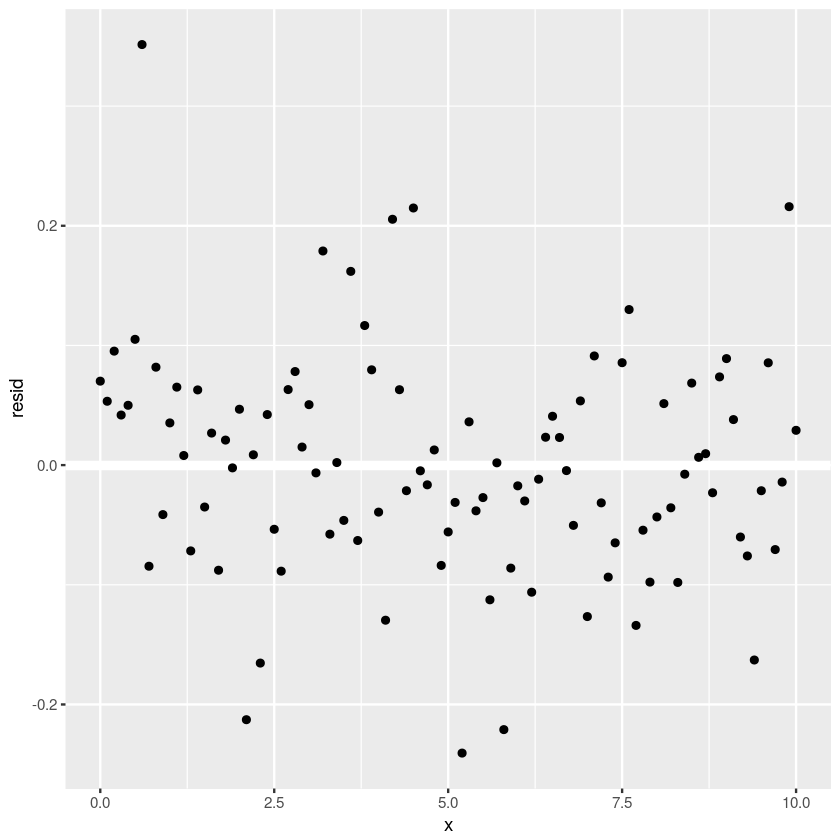

In [30]:
grid <- data_grid(sine.change.period, x)
print(grid)

grid <- add_predictions(grid, mod4)
print(grid)

mod4_resids <- add_residuals(sine.change.period, mod4)
print(mod4_resids)

mod4_resids<-ggplot(mod4_resid) +
geom_ref_line(h=0) +
geom_point(aes(x, y=resid))
mod4_resids
ggsave("mod4_resids.png", plot = mod4_resids, device="png", scale=1, width=5, height=4)

# A tibble: 101 × 1
       x
   <dbl>
1    0.0
2    0.1
3    0.2
4    0.3
5    0.4
6    0.5
7    0.6
8    0.7
9    0.8
10   0.9
# ... with 91 more rows
# A tibble: 101 × 2
       x      pred
   <dbl>     <dbl>
1    0.0 0.1381788
2    0.1 0.1455683
3    0.2 0.1522344
4    0.3 0.1575247
5    0.4 0.1609213
6    0.5 0.1620916
7    0.6 0.1609213
8    0.7 0.1575247
9    0.8 0.1522344
10   0.9 0.1455683
# ... with 91 more rows
# A tibble: 101 × 3
       x          y       resid
   <dbl>      <dbl>       <dbl>
1    0.0 0.08565849 -0.05252033
2    0.1 0.22140428  0.07583598
3    0.2 0.41207749  0.25984306
4    0.3 0.50004602  0.34252131
5    0.4 0.63865998  0.47773870
6    0.5 0.81013584  0.64804419
7    0.6 1.15583414  0.99491286
8    0.7 0.79986386  0.64233916
9    0.8 1.02474872  0.87251429
10   0.9 0.93728862  0.79172032
# ... with 91 more rows


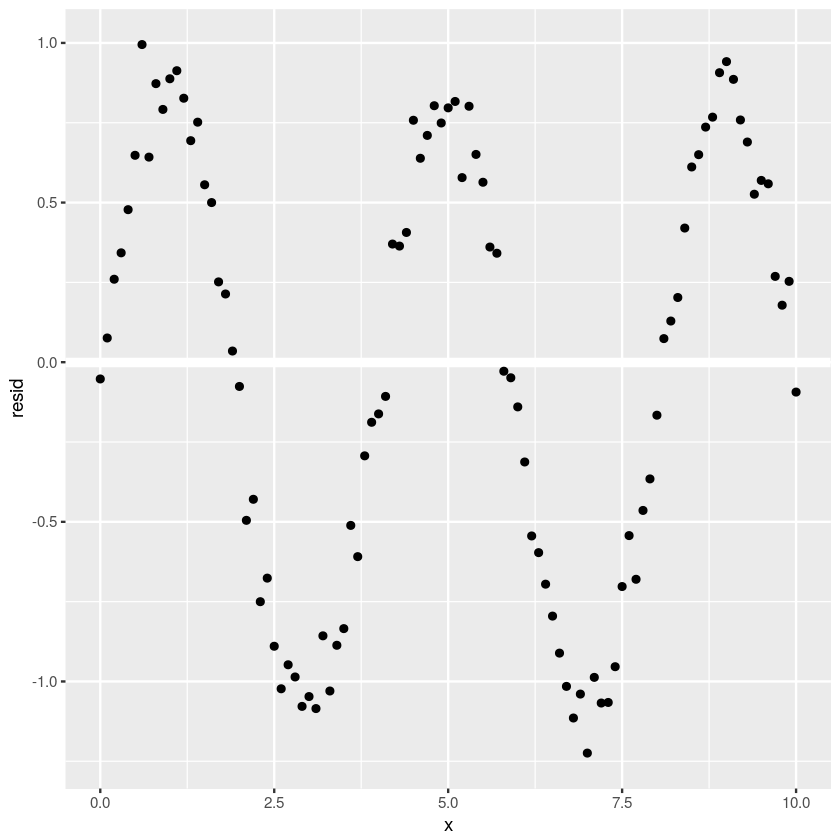

In [31]:
grid <- data_grid(sine.change.period, x)
print(grid)

grid <- add_predictions(grid, mod2)
print(grid)

mod2_resid <- add_residuals(sine.change.period, mod2)
print(mod2_resid)

mod2_resids<-ggplot(mod2_resid) +
geom_ref_line(h=0) +
geom_point(aes(x, y=resid))
mod2_resids
ggsave("mod2_resids.png", plot = mod2_resids, device="png", scale=1, width=5, height=4)

It seems that model 4 is the best fit as it has equal variance where as model 2 residuals seem to actually resemble a sine function.